This is script enables visualization of the effects Conservation Practices (NRS) have on Nitrogen Load.
Acknowledgement: The NRS document refers to Nitrate-N concentration loss. Our current model calculates Nitrogen Surplus instead of Nitrogen Concentration. Currently, we assume that the change in % Nitrate-N is the same change for % Nitrogen Surplus. 


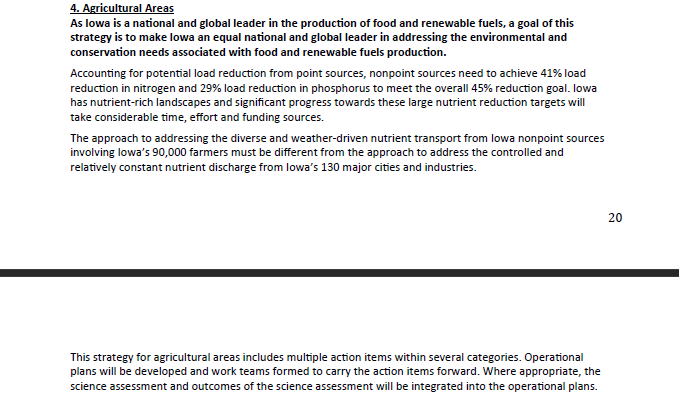

### 0. Libraries

In [27]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
sns.set()
import re
import os

import textwrap
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import IPython.display
from IPython.display import display, clear_output
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual

### 1. Get data

In [28]:
parent_dir = os.getcwd()

path = os.path.join(parent_dir,"IFEWs_1997to2019.csv")
df_ifew = pd.read_csv(path)

path = os.path.join(parent_dir,'NRS_py_conservation.csv')
df_pract = pd.read_csv(path)

In [29]:
df_pract

,Practice,Names List,Comments,% AVG Nitrate-N Reduction+,% Corn Yield Change++
0,Timing,Moving from Fall to Spring Pre-plant Application,Moving from Fall to Spring Pre-plant Application,6,4
1,Timing,Spring pre-plant/sidedress 40-60 split Compare...,Spring pre-plant/sidedress 40-60 split Compare...,5,10
2,Timing,Sidedress - Compared to Pre-plant Application,Sidedress - Compared to Pre-plant Application,7,0
3,Timing,Sidedress - Soil Test Based Compared to Pre-plant,Sidedress - Soil Test Based Compared to Pre-plant,4,13
4,Source,Liquid Swine Manure Compared to Spring-Applied...,Liquid Swine Manure Compared to Spring-Applied...,4,0
5,Source,Poultry Manure Compared to Spring Applied Fert...,Poultry Manure Compared to Spring Applied Fert...,-3,-2
6,Nitrogen Application Rate,Reduce to Maximum Return to Nitrogen value 14...,Reduce to Maximum Return to Nitrogen value 14...,10,-1
7,Nitrification Inhibitor,Nitrapyrin in Fall - Compared to Fall- Applied...,Nitrapyrin in Fall - Compared to Fall- Applied...,9,6
8,Cover Crops,Rye,Rye,31,-6
9,Cover Crops,Oat,Oat,28,-5


### 2. Organize data format

In [30]:
df_pract = df_pract.replace(to_replace=r'^-$', value=0, regex=True)

for i in range(len(df_pract)):
    df_pract['Names List'][i] = " ".join(df_pract['Names List'][i].split())
    
df_pract    

<ipython-input-30-d4c786dcb599>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-30-d4c786dcb599>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-30-d4c786dcb599>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-30-d4c786dcb599>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

,Practice,Names List,Comments,% AVG Nitrate-N Reduction+,% Corn Yield Change++
0,Timing,Moving from Fall to Spring Pre-plant Application,Moving from Fall to Spring Pre-plant Application,6,4
1,Timing,Spring pre-plant/sidedress 40-60 split Compare...,Spring pre-plant/sidedress 40-60 split Compare...,5,10
2,Timing,Sidedress - Compared to Pre-plant Application,Sidedress - Compared to Pre-plant Application,7,0
3,Timing,Sidedress - Soil Test Based Compared to Pre-plant,Sidedress - Soil Test Based Compared to Pre-plant,4,13
4,Source,Liquid Swine Manure Compared to Spring-Applied...,Liquid Swine Manure Compared to Spring-Applied...,4,0
5,Source,Poultry Manure Compared to Spring Applied Fert...,Poultry Manure Compared to Spring Applied Fert...,-3,-2
6,Nitrogen Application Rate,Reduce to Maximum Return to Nitrogen value 149...,Reduce to Maximum Return to Nitrogen value 14...,10,-1
7,Nitrification Inhibitor,Nitrapyrin in Fall - Compared to Fall- Applied...,Nitrapyrin in Fall - Compared to Fall- Applied...,9,6
8,Cover Crops,Rye,Rye,31,-6
9,Cover Crops,Oat,Oat,28,-5


In [32]:
# Create dropdown lists
y_lst = (df_ifew['Year'].unique()).tolist() #year
r_lst = ((df_ifew['County'].unique()).tolist()) # region
r_lst.sort() # alphabeticallly
r_lst.insert(0,'Iowa')
p_lst = (df_pract['Names List']).tolist() #practice
#len(r_lst)

In [33]:
df_r = df_ifew.loc[df_ifew['Year'] == 2015]
nr_change = df_pract.loc[df_pract['Names List']=='Moving from Fall to Spring Pre-plant Application','% AVG Nitrate-N Reduction+'].item()
df_r
Ns = df_r['NS'].sum()
Nnew = Ns-((int(nr_change)/100)*Ns)

In [34]:
# Create a function takes the info on the dropdown lists (chosen region) and calculates the Nitrogen surplus based on the chosen practice.

def n_ifew(df_ifew, selectedRegion, practice, df_pract, perc):        
    # Region Selection
    r = selectedRegion
    df = df_ifew
    if (r == 'Iowa'):
        df_r = df.groupby(['Year']).sum()
        df_r = df_r.reset_index()
    else:
        df_r = df[df['County'] == r].copy()
       
    # WHAT IF ACCOUNT FOR MULTIPLE PRACTICES?
    nr_change = df_pract.loc[df_pract['Names List']==practice,'% AVG Nitrate-N Reduction+'].item()
    cy_change = df_pract.loc[df_pract['Names List']==practice,'% Corn Yield Change++']  
    
    
    #calculate values produced by query
    df_r.loc[:,'Nnew'] = df_r['NS']-((int(nr_change)/100)*df_r['NS'])
    df_r.loc[:,'Cnew'] = df_r['CGY']+((int(cy_change)/100)*df_r['CGY'])

    # total area in hectares of application of nitrogen - do we consider Soybean crops?
    #df_r['total_area_ha'] = (df_r['CornAcresPlanted']+ df_r['SoybeansAcresPlanted'])/2.57
    # total area in hectares of application of nitrogen - do we not consider Soybean crops?
    df_r.loc[:,'total_area_ha'] = (df_r['CAP'])/2.57

    # Nitrogen Load Old in metric tons
    df_r.loc[:,'Old_N_tons'] = df_r['total_area_ha']*df_r['NS']/1000
    # Nitrogen Load New in metric tons
    df_r.loc[:,'New_N_tons'] = df_r['total_area_ha']*df_r['Nnew']/1000
    # Corn yield Old in bushels
    df_r.loc[:,'Old_Corn_bushels'] = df_r['CAP']*df_r['CGY']
    # Corn Yield New
    df_r.loc[:,'New_Corn_bushels'] = df_r['CAP']*df_r['Cnew']   

    return df_r

In [35]:
#%%capture --no-display #hide warning here
trial = (n_ifew(df_ifew, 'Monroe', 'Moving from Fall to Spring Pre-plant Application', df_pract, 50))
trial

<ipython-input-34-a3e6d35f1f90>:20: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



,Year,County,Beef Cattle,Hogs,Milk Cattle,Other Cattle,CAP,CGH,CGY,SH,...,GN,FN,NS,Nnew,Cnew,total_area_ha,Old_N_tons,New_N_tons,Old_Corn_bushels,New_Corn_bushels
1909,1997,Monroe,17813.0,43956.000000,660.0,36073.00,29100.0,27700.0,127.20,27800.0,...,144.0,71.1,79.4,74.636,132.288,11322.957198,899.042802,845.100233,3701520.0,3849580.8
1910,1998,Monroe,18531.5,51072.597895,695.5,32237.04,28700.0,26200.0,111.90,29000.0,...,132.3,62.4,80.0,75.200,116.376,11167.315175,893.385214,839.782101,3211530.0,3339991.2
1911,1999,Monroe,18531.5,55662.096842,695.5,28770.36,25000.0,22900.0,110.80,30100.0,...,121.5,50.8,82.9,77.926,115.232,9727.626459,806.420233,758.035019,2770000.0,2880800.0
1912,2000,Monroe,18531.5,57724.496842,695.5,25672.96,27000.0,25000.0,135.80,32400.0,...,137.3,59.9,61.8,58.092,141.232,10505.836576,649.260700,610.305058,3666600.0,3813264.0
1913,2001,Monroe,18531.5,57259.797895,695.5,22944.84,15000.0,13300.0,115.90,21500.0,...,139.2,70.0,129.4,121.636,120.536,5836.575875,755.252918,709.937743,1738500.0,1808040.0
1914,2002,Monroe,19250.0,54268.000000,731.0,20586.00,27000.0,25000.0,158.00,26900.0,...,147.2,60.8,51.1,48.034,164.320,10505.836576,536.848249,504.637354,4266000.0,4436640.0
1915,2003,Monroe,18531.5,48749.103158,695.5,18596.44,29000.0,26000.0,129.60,26800.0,...,99.7,15.1,42.8,40.232,134.784,11284.046693,482.957198,453.979767,3758400.0,3908736.0
1916,2004,Monroe,18531.5,40703.107368,695.5,16976.16,29500.0,27500.0,171.30,25900.0,...,166.2,76.2,38.8,36.472,178.152,11478.599222,445.369650,418.647471,5053350.0,5255484.0
1917,2005,Monroe,18531.5,30647.231579,695.5,15725.16,29000.0,27000.0,154.30,28300.0,...,162.6,81.1,37.1,34.874,160.472,11284.046693,418.638132,393.519844,4474700.0,4653688.0
1918,2006,Monroe,18531.5,21684.789474,695.5,14843.44,27500.0,25900.0,137.00,27400.0,...,139.1,60.5,35.8,33.652,142.480,10700.389105,383.073930,360.089494,3767500.0,3918200.0


In [36]:
# Plot Nitrogen
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=trial["Year"], y=trial['Old_N_tons'],
                    mode='lines',
                    name='Historical Nitrogen Load (tons)'))
fig.add_trace(go.Scatter(x=trial["Year"], y=trial['New_N_tons'],
                    mode='lines',
                    name='Possible Nitrogen Load (tons)'))


fig.show()

In [37]:
# Plot Corn
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=trial["Year"], y=trial['Old_Corn_bushels'],
                    mode='lines',
                    name='Historical Harvested Corn (bushels)'))
fig.add_trace(go.Scatter(x=trial["Year"], y=trial['New_Corn_bushels'],
                    mode='lines',
                    name='Possible Harvested Corn (bushels)'))


fig.show()

In [38]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(go.Scatter(x=trial["Year"], y=trial['Old_N_tons'],
                    mode='lines',
                    name='Historical Nitrogen Load (tons)'),
             secondary_y=False,
             )
fig.add_trace(go.Scatter(x=trial["Year"], y=trial['New_N_tons'],
                    mode='lines',
                    name='Possible Nitrogen Load (tons)'),
             secondary_y=False,
             )


fig.add_trace(go.Scatter(x=trial["Year"], y=trial['Old_Corn_bushels'],
                    mode='lines',
                    name='Historical Harvested Corn (bushels)'),
             secondary_y=True,
             )
fig.add_trace(go.Scatter(x=trial["Year"], y=trial['New_Corn_bushels'],
                    mode='lines',
                    name='Possible Harvested Corn (bushels)'),
             secondary_y=True,
             )


# Add figure title
fig.update_layout(
    title_text="Change from Conservation Practice"
)

# Set x-axis title
fig.update_xaxes(title_text="Year")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Tons of Nitrogen</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Corn Bushels</b>", secondary_y=True)

fig.show()

## Define Sliders Widget

## Text Widget

In [39]:
CP = widgets.Dropdown(
    options = p_lst,
    value='Moving from Fall to Spring Pre-plant Application',
    description='Chosen Conservation Practice',
    disabled=False,
)

CR = widgets.Dropdown(
    options = r_lst,
    value='Monroe',
    description='Observed Region',
    disabled=False,
)

In [42]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [43]:
def f(CP, CR):
    # Region Selection
    r = CR
    df = df_ifew
    if (r == 'Iowa'):
        df_r = df.groupby(['Year']).sum()
        df_r = df_r.reset_index()
    else:
        df_r = df[df['County'] == r].copy()
        
    # WHAT IF ACCOUNT FOR MULTIPLE PRACTICES?
    nr_change = df_pract.loc[df_pract['Names List']==CP,'% AVG Nitrate-N Reduction+'].item()
    cy_change = df_pract.loc[df_pract['Names List']==CP,'% Corn Yield Change++']  
    
    
   #calculate values produced by query
    df_r.loc[:,'Nnew'] = df_r['NS']-((int(nr_change)/100)*df_r['NS'])
    df_r.loc[:,'Cnew'] = df_r['CGY']+((int(cy_change)/100)*df_r['CGY'])

    # total area in hectares of application of nitrogen - do we consider Soybean crops?
    #df_r['total_area_ha'] = (df_r['CornAcresPlanted']+ df_r['SoybeansAcresPlanted'])/2.57
    # total area in hectares of application of nitrogen - do we not consider Soybean crops?
    df_r.loc[:,'total_area_ha'] = (df_r['CAP'])/2.57

    # Nitrogen Load Old in metric tons
    df_r.loc[:,'Old_N_tons'] = df_r['total_area_ha']*df_r['NS']/1000
    # Nitrogen Load New in metric tons
    df_r.loc[:,'New_N_tons'] = df_r['total_area_ha']*df_r['Nnew']/1000
    # Corn yield Old in bushels
    df_r.loc[:,'Old_Corn_bushels'] = df_r['CAP']*df_r['CGY']
    # Corn Yield New
    df_r.loc[:,'New_Corn_bushels'] = df_r['CAP']*df_r['Cnew'] 
    
    
    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Add traces
    fig.add_trace(go.Scatter(x=df_r["Year"], y=df_r['Old_N_tons'],
                        mode='lines',
                        name='Historical Nitrogen Load (tons)'),
                 secondary_y=False,
                 )
    fig.add_trace(go.Scatter(x=df_r["Year"], y=df_r['New_N_tons'],
                        mode='lines',
                        name='Possible Nitrogen Load (tons)'),
                 secondary_y=False,
                 )


    fig.add_trace(go.Scatter(x=df_r["Year"], y=df_r['Old_Corn_bushels'],
                        mode='lines',
                        name='Historical Harvested Corn (bushels)'),
                 secondary_y=True,
                 )
    fig.add_trace(go.Scatter(x=df_r["Year"], y=df_r['New_Corn_bushels'],
                        mode='lines',
                        name='Possible Harvested Corn (bushels)'),
                 secondary_y=True,
                 )

    # Add figure title
    fig.update_layout(
        title_text="Change from Conservation Practice"
    )

    # Set x-axis title
    fig.update_xaxes(title_text="Year")

    # Set y-axes titles
    fig.update_yaxes(title_text="<b>Tons of Nitrogen</b>", secondary_y=False)
    fig.update_yaxes(title_text="<b>Corn Bushels</b>", secondary_y=True)

    fig.show()
    
ui = widgets.HBox([CP, CR])    

out = widgets.interactive_output(f, {'CP': CP, 'CR': CR})

display(ui, out)

Output()